<a href="https://colab.research.google.com/github/sanskriti-18/BharatInterntask2/blob/main/rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seeding for reproducibility**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
data = '/content/drive/MyDrive/dataset2'
data

'/content/drive/MyDrive/dataset2'

In [20]:
from glob import glob

categories = glob('/content/drive/MyDrive/dataset2*')


In [21]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [22]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

In [23]:
print(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train"))


print(len(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train/BrownSpot")))
print(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train/BrownSpot")[:5])

print(len(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train/Healthy")))
print(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train/Healthy")[:5])

print(len(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train/Hispa")))
print(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train/Hispa")[:5])

print(len(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train/LeafBlast")))
print(os.listdir("/content/drive/MyDrive/dataset2/RiceDiseaseDataset/train/LeafBlast")[:5])

['Hispa', 'Healthy', 'LeafBlast', 'BrownSpot']
400
['IMG_20190419_095715.jpg', 'IMG_20190419_095712.jpg', 'IMG_20190419_103247.jpg', 'IMG_20190419_095736.jpg', 'IMG_20190419_095726.jpg']
400
['IMG_20190419_094746.jpg', 'IMG_20190419_095611.jpg', 'IMG_20190419_095003.jpg', 'IMG_20190419_095442.jpg', 'IMG_20190419_094756.jpg']
400
['IMG_20190419_095623.jpg', 'IMG_20190419_094850.jpg', 'IMG_20190419_095315.jpg', 'IMG_20190419_095001.jpg', 'IMG_20190419_095310.jpg']
400
['IMG_20190419_100501.jpg', 'IMG_20190419_095439.jpg', 'IMG_20190419_095429.jpg', 'IMG_20190419_100511.jpg', 'IMG_20190419_100509.jpg']


In [24]:
print(len(os.listdir("/content/drive/MyDrive/LabelledRice/Labelled/pimages")))
print(os.listdir("/content/drive/MyDrive/LabelledRice/Labelled/pimages")[:5])

4
['BrownSpot', 'Healthy', 'LeafBlast', 'Hispa']


**Data Preprocessing**

In [25]:
from google.colab import drive



# Step 2: Define the path to save the labels file
labels_path = '/content/drive/MyDrive/LabelledRice/Labelled/labels.txt'

# Step 3: Assume you have a list of labels
# For example: labels = ['cat', 'dog', 'bird', ...]
labels = ['BrownSpot', 'Healthy', 'LeafBlast', 'Hispa']  # Replace this with your actual labels list

# Step 4: Write labels to labels.txt
with open(labels_path, 'w') as file:
    for label in labels:
        file.write(f"{label}\n")

print(f"Labels saved to {labels_path}")


Labels saved to /content/drive/MyDrive/LabelledRice/Labelled/labels.txt


Labels saved to /content/drive/MyDrive/LabelledRice/Labelled/labels.txt
Number of images loaded: 4
Number of labels loaded: 4


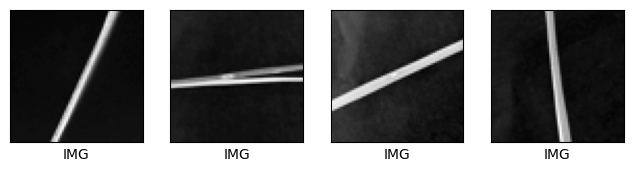

In [26]:
from google.colab import drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



# Step 2: Define the paths
image_dir = '/content/drive/MyDrive/LabelledRice/Labelled/images'
labels_path = '/content/drive/MyDrive/LabelledRice/Labelled/labels.txt'

# Step 3: Extract labels from filenames and save to labels.txt
labels = []
for filename in sorted(os.listdir(image_dir)):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Extract label from the filename (assuming format 'label_XX.jpg')
        label = filename.split('_')[0]
        labels.append(label)

# Write labels to labels.txt
with open(labels_path, 'w') as file:
    for label in labels:
        file.write(f"{label}\n")

print(f"Labels saved to {labels_path}")

# Step 4: Load and Resize Images
images = []
for filename in sorted(os.listdir(image_dir)):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((64, 64))  # Resize all images to 64x64 pixels
        img = np.array(img) / 255.0  # Normalize the image
        images.append(img)

# Step 5: Convert images list to numpy array
images = np.array(images)

# Debugging: Print the number of loaded images and labels
print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")

# Ensure there are images and labels loaded
if len(images) == 0 or len(labels) == 0:
    raise ValueError("No images or labels found. Please check the directory paths and filenames.")

# Step 6: Define the function to plot images with labels
def plot_images_with_labels(images, labels, num_images):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

# Step 7: Determine the number of images to plot
num_images_to_plot = min(10, len(images), len(labels))

# Step 8: Use the function to plot the images in the dataset
plot_images_with_labels(images, labels, num_images=num_images_to_plot)


In [27]:
# Dataset Path
base_dir = '/content/drive/MyDrive/LabelledRice/Labelled/pimages'

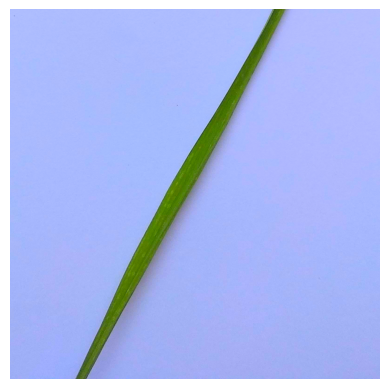

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/LabelledRice/Labelled/pimages/Healthy/IMG_20190419_094251.jpg'

# Read the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()


In [29]:
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/LabelledRice/Labelled/pimages/Healthy/IMG_20190419_094251.jpg'

# Read the image
img = mpimg.imread(image_path)

# Print the image array
print(img)


[[[173 188 255]
  [175 190 255]
  [175 190 255]
  ...
  [180 189 255]
  [180 189 255]
  [180 189 255]]

 [[173 188 255]
  [175 190 255]
  [174 189 254]
  ...
  [180 189 255]
  [180 189 255]
  [180 189 255]]

 [[175 190 255]
  [175 190 255]
  [176 192 254]
  ...
  [182 192 254]
  [181 191 253]
  [179 188 255]]

 ...

 [[156 173 245]
  [153 170 242]
  [155 172 244]
  ...
  [161 169 241]
  [160 168 240]
  [154 169 236]]

 [[157 174 246]
  [159 176 248]
  [158 175 247]
  ...
  [162 170 242]
  [160 168 240]
  [157 170 238]]

 [[159 176 248]
  [159 176 248]
  [159 176 248]
  ...
  [163 171 243]
  [160 168 240]
  [155 170 237]]]


In [30]:
# Image Parameters
img_size = 124
batch_size = 32

Data Augmentation

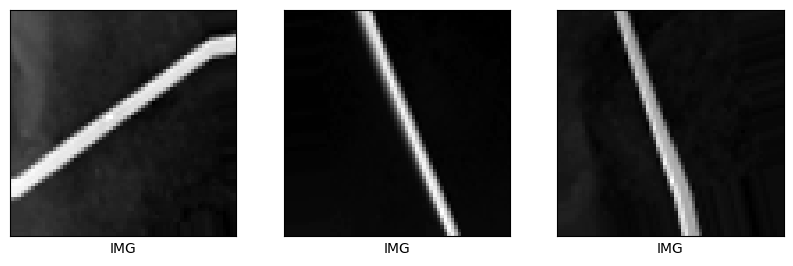

In [31]:
from google.colab import drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split



# Step 2: Define the paths and load images
image_dir = '/content/drive/MyDrive/LabelledRice/Labelled/images/'

# Load images
images = []
labels = []
for filename in sorted(os.listdir(image_dir)):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((64, 64))  # Resize all images to 64x64 pixels
        img = np.array(img) / 255.0  # Normalize the image
        images.append(img)

        # Extract label from the filename (assuming format 'label_XX.jpg')
        label = filename.split('_')[0]
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Assuming you have already split images and labels into training and testing datasets
# Here we'll split them for demonstration purposes
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape images for the datagen (if they are grayscale, expand dims to match the input shape of the generator)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Step 3: Set Up ImageDataGenerator for Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(x_train)

# Generate augmented images (optional visualization)
def plot_augmented_images(datagen, x_train, y_train):
    plt.figure(figsize=(10, 10))
    batch_size = 9  # Number of images to display
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=batch_size):
        for i in range(min(batch_size, len(x_batch))):
            plt.subplot(3, 3, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(x_batch[i].reshape(64, 64), cmap=plt.cm.binary)
            plt.xlabel(y_batch[i])
        break  # We need only one batch to display
    plt.show()

# Plot some augmented images
plot_augmented_images(datagen, x_train, y_train)


**Train Test Split**

In [33]:
import os
import shutil
from sklearn.model_selection import train_test_split
from google.colab import drive



# Define the dataset path and categories
dataset_path = '/content/drive/MyDrive/dataset2/RiceDiseaseDataset'
train_dataset_path = os.path.join(dataset_path, 'train')
validation_dataset_path = os.path.join(dataset_path, 'validation')

# Define the directories for new training and validation sets
new_train_dir = '/content/drive/MyDrive/LabelledRice/Labelled/data/train'
new_validation_dir = '/content/drive/MyDrive/LabelledRice/Labelled/data/validation'

# Ensure the new train and validation directories exist
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_validation_dir, exist_ok=True)

# Function to copy images to respective directories
def copy_images(source_dir, dest_dir, images):
    for img in images:
        if os.path.isfile(os.path.join(source_dir, img)):  # Check if it's a file
            shutil.copy(os.path.join(source_dir, img), os.path.join(dest_dir, img))

# Process train dataset
for category in os.listdir(train_dataset_path):
    category_path = os.path.join(train_dataset_path, category)
    new_train_category_path = os.path.join(new_train_dir, category)

    # Ensure the category directory exists in new train directory
    os.makedirs(new_train_category_path, exist_ok=True)

    if not os.path.exists(category_path):
        print(f"Category directory {category_path} does not exist, skipping.")
        continue

    images = os.listdir(category_path)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    copy_images(category_path, new_train_category_path, train_images)
    copy_images(category_path, new_validation_dir, val_images)

# Process validation dataset
for category in os.listdir(validation_dataset_path):
    category_path = os.path.join(validation_dataset_path, category)
    new_validation_category_path = os.path.join(new_validation_dir, category)

    # Ensure the category directory exists in new validation directory
    os.makedirs(new_validation_category_path, exist_ok=True)

    if not os.path.exists(category_path):
        print(f"Category directory {category_path} does not exist, skipping.")
        continue

    images = os.listdir(category_path)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    copy_images(category_path, new_train_dir, train_images)
    copy_images(category_path, new_validation_category_path, val_images)

print("Dataset split into new training and validation sets successfully.")


Dataset split into new training and validation sets successfully.


In [35]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Set dataset path
dataset_path = '/content/drive/MyDrive/LabelledRice/Labelled/pimages'  # Change this to the actual path of your dataset

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Model creation
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze the last few layers of the base model
for layer in base_model.layers[:-4]:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Model compilation with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,  # Increase the number of epochs for better training
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Model evaluation
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)

# Save the trained model
model.save('rice_leaf_disease_detection_model_vgg16.h5')

# Evaluate the model using the validation data
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Generate classification report and confusion matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n", pd.DataFrame(report).transpose())
print("Confusion Matrix:\n", conf_matrix)

# Create and print metrics table
metrics_df = pd.DataFrame(report).transpose()
print("\nMetrics Table:\n", metrics_df)


Found 1685 images belonging to 4 classes.
Found 420 images belonging to 4 classes.
Epoch 1/5
52/52 [==============================] - 1121s 22s/step - loss: 1.2363 - accuracy: 0.3750 - val_loss: 1.2227 - val_accuracy: 0.3654
Epoch 2/5
52/52 [==============================] - 177s 3s/step - loss: 1.1044 - accuracy: 0.4997 - val_loss: 1.2005 - val_accuracy: 0.4183
Epoch 3/5
52/52 [==============================] - 174s 3s/step - loss: 1.0385 - accuracy: 0.5445 - val_loss: 1.1785 - val_accuracy: 0.4303
Epoch 4/5
52/52 [==============================] - 169s 3s/step - loss: 0.9821 - accuracy: 0.5753 - val_loss: 1.1751 - val_accuracy: 0.4183
Epoch 5/5
52/52 [==============================] - 164s 3s/step - loss: 0.9646 - accuracy: 0.5826 - val_loss: 1.1411 - val_accuracy: 0.4519
14/14 - 37s - loss: 1.1340 - accuracy: 0.4881 - 37s/epoch - 3s/step

Test accuracy: 0.488095223903656


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 34s 2s/step
Accuracy: 0.3429
Precision: 0.3416
Recall: 0.3429
F1 Score: 0.3192

Classification Report:
               precision    recall  f1-score     support
BrownSpot      0.000000  0.000000  0.000000   14.000000
Healthy        0.319838  0.572464  0.410390  138.000000
Hispa          0.346154  0.159292  0.218182  113.000000
LeafBlast      0.388430  0.303226  0.340580  155.000000
accuracy       0.342857  0.342857  0.342857    0.342857
macro avg      0.263605  0.258745  0.242288  420.000000
weighted avg   0.341571  0.342857  0.319234  420.000000
Confusion Matrix:
 [[ 0  8  2  4]
 [ 0 79 16 43]
 [ 0 68 18 27]
 [ 0 92 16 47]]

Metrics Table:
               precision    recall  f1-score     support
BrownSpot      0.000000  0.000000  0.000000   14.000000
Healthy        0.319838  0.572464  0.410390  138.000000
Hispa          0.346154  0.159292  0.218182  113.000000
LeafBlast      0.388430  0.303226  0.340580  155.000000
accuracy       0.342857  0.342

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

**Building a Predictive System**

In [ ]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))

    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, Accuracy: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)
    plt.show()

SOURCE: class: Healthy, file: Healthy/IMG_20190419_175311.jpg


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


**Save the model to Google drive or local**

In [ ]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('plant_disease_prediction_model.h5')